# MCD8009: Data Discovery - Laboratorio 2

**Integrantes**

| N° | Código | Nombres |  Contribución (0% - 100%) |
|----|--------|---------|---------------------------|
| 1  |        |         |                           |
| 2  |        |         |                           | 
| 3  |        |         |                           |
| 4  |        |         |                           |

### Indicaciones

- El laboratorio podrá resolverse de manera **individual o en equipos de hasta cuatro (4) personas**. Deberán completar los datos de todos los integrantes, y **una sola persona realizará la entrega del archivo ipynb**.

- Salvo que se indique explícitamente lo contrario, no se prohibe el uso de herramientas de Inteligencia Artificial Generativa, siempre que los integrantes comprendan y puedan explicar el proceso y los resultados obtenidos. **Las respuestas no deben consistir en transcripciones literales de resultados generados por estas herramientas, sino evidenciar comprensión del tema por parte del estudiante o del equipo.**

- En caso de utilizar herramientas de IA Generativa, cada equipo es responsable de verificar la coherencia de las respuestas presentadas. Si se detectan errores, inconsistencias o falta de comprensión, la pregunta podrá ser anulada sin derecho a reclamo.

- En todos los casos, deberá completarse la **Declaración de Uso de IA Generativa.**

- Pueden agregar libremente celdas de código o de Markdown según lo consideren conveniente.

### Declaración de uso de IA Generativa
- Indicar de manera breve la(s) herramienta(s) y/o modelo(s) de IA Generativa utilizados, especificando en qué pregunta(s) se emplearon y con qué propósito.
- En caso no se haya usado, también indicarlo.

## INICIO DEL LABORATORIO

## Parte 1: EDA (5 puntos)

**Contexto:** El dataset de Boston Housing, uno de los dataset más reconocidos en el campo del aprendizaje automático, es una recopilación de datos derivados del Área Estadística Metropolitana Estándar de Boston (SMSA) en la década de 1970. Este dataset se utiliza comúnmente en el análisis de regresión para predecir el valor medio de las viviendas en el área de Boston en función de varias variables predictivas. 

El dataset de viviendas de Boston contiene varias columnas que se utilizan para describir diversos aspectos de las viviendas residenciales de Boston. A continuación, se incluye una descripción de cada columna del dataset:

**1. CRIM:** Tasa de criminalidad per cápita por localidad. Indica el nivel de criminalidad en la zona.

**2. ZN:** Proporción de terrenos residenciales destinados a lotes de más de 25.000 pies cuadrados. Esta característica refleja la densidad residencial del área.

**3. INDUS:** Proporción de acres de terrenos destinados a negocios no minoristas por ciudad. Este es un indicador del uso comercial de terrenos fuera de las áreas residenciales.

**4. CHAS:** variable ficticia de Charles River (1 si el terreno limita con el río; 0 en caso contrario). Esto indica si la propiedad está cerca del río Charles, lo que puede agregar valor estético al vecindario.

**5. NOX:** Concentración de óxidos nítricos (partes por 10 millones). Representa el nivel de contaminantes industriales en la zona.

**6. RM:** Número medio de habitaciones por vivienda. Más habitaciones suelen indicar alojamiento más espacioso.

**7. AGE:** Proporción de unidades ocupadas por sus propietarios construidas antes de 1940. Las estructuras más antiguas pueden carecer de comodidades más nuevas o podrían considerarse más prestigiosas dependiendo de la arquitectura y la condición.

**8. DIS:** Distancias ponderadas a cinco centros de empleo de Boston. Esta característica mide la accesibilidad a los lugares de trabajo, lo que puede influir en los precios de la vivienda.

**9. RAD:** Índice de accesibilidad a carreteras radiales. Los valores más altos indican un acceso más fácil a las vías principales.

**10. TAX:** Tasa de impuesto a la propiedad sobre el valor total de la misma por cada $10,000. Refleja la tasa anual de impuesto a la propiedad.

**11. PTRATIO:** Ratio de alumnos por profesor por localidad. Los valores más bajos suelen indicar mejores instalaciones educativas.

**12. B:** Medida del porcentaje de población afroamericana

**13.LSTAT:** Porcentaje de población con bajo estatus socioeconómico.

**14. PRICE:**  Precio de las casas en miles de dólares.

#### Instrucciones
1. Cree un pairplot e indique dos conclusiones relevantes a partir de este análisis.

2. ¿Cuál es la media y mediana de los precios de las viviendas en Boston? ¿Cuál la desviación estándar y rango intercuartil de los precios de las viviendas de Boston? Interprete cada uno de estos valores. ¿Cuál medida de tendencia central y de variabilidad usaría para describir el precio de las viviendas de Boston? 

3. ¿Cuál es la proporción de viviendas que están cerca del río Charles (variable "CHAS")? Además, cree un gráfico que muestre la proporción de viviendas cerca y lejos del río Charles.

4. Cree un gráfico que permita comparar los precios de las viviendas en función de la variable "CHAS" 
¿Hay alguna diferencia en los precios de las viviendas en función de esta variable?

5. Calcule el coeficiente de correlación entre la variable "RM" (número promedio de habitaciones por vivienda) y el precio de las viviendas. Interprete dicho coeficiente.

6. ¿Cuáles son las dos variables más fuertemente positivamente correlacionadas y más negativamente correlacionadas con el precio de las viviendas?. Interprete esto: ¿Le hace sentido? ¿Cuáles serían las posibles razones detrás de estos patrones observados?

In [1]:
import chardet
import csv
import pandas as pd

def leer_csv(ruta_archivo, sample_size=8192):
    """
    Leemos el archivo CSV una sola vez.
    """
    with open(ruta_archivo, 'rb') as f:
        return f.read(sample_size)

def detectar_encoding(rawdata):
    """
    Detecta la codificación del archivo.
    Los argumentos deben ser definidos por el alumno.
    """    
    print(chardet.detect(rawdata))
    return chardet.detect(rawdata)["encoding"]

def detectar_delimitador(rawdata, encoding):
    """
    Detecta el delimitador del archivo CSV.
    Los argumentos deben ser definidos por el alumno.
    """
    texto = rawdata.decode(encoding, errors="ignore")

    # Limpiar saltos de línea y espacios en blanco
    texto = texto.replace("\r", "").replace("\n", "").replace(" ", "")

    sniffer = csv.Sniffer()
    dialect = sniffer.sniff(texto)

    return dialect.delimiter


def leer_csv_inteligente(ruta_archivo, skip_lines=1):
    """
    Lee un archivo CSV detectando automáticamente:
    - El encoding
    - El delimitador

    Parámetros:
    - ruta_archivo: ruta al archivo CSV
    - skip_lines: número de líneas iniciales a ignorar

    Retorna:
    - pandas.DataFrame
    """
    raw_sample = leer_csv(ruta_archivo)

    encoding = detectar_encoding(raw_sample)
    print(f"Encoding detectado: {encoding}")

    delimitador = detectar_delimitador(raw_sample, encoding)
    print(f"Delimitador detectado: '{delimitador}'")
    
    df = pd.read_csv(
        ruta_archivo,
        encoding=encoding,
        sep=delimitador,
        skiprows=skip_lines
    )

    return df

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el dataset
df = leer_csv_inteligente("boston.csv", skip_lines=0)

# Mostrar las primeras filas del dataset
df.head()

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
Encoding detectado: ascii
Delimitador detectado: ';'


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [36]:
# Variables númericas
cantidad_var_numericas = df.select_dtypes(include='number').shape[1]
print(f"Cantidad de variables numéricas: {cantidad_var_numericas}")

# Nombre de las variables numéricas
variables_numericas = df.select_dtypes(include='number').columns.tolist()
print(f"Variables numéricas: {variables_numericas}")

Cantidad de variables numéricas: 14
Variables numéricas: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


In [39]:
# Revisar la varianza de las variables numéricas
df[variables_numericas].var().sort_values()

NOX            0.013428
CHAS           0.064513
RM             0.493671
DIS            4.434015
PTRATIO        4.686989
INDUS         47.064442
LSTAT         50.994760
CRIM          73.986578
RAD           75.816366
PRICE         84.586724
ZN           543.936814
AGE          792.358399
B           8334.752263
TAX        28404.759488
dtype: float64

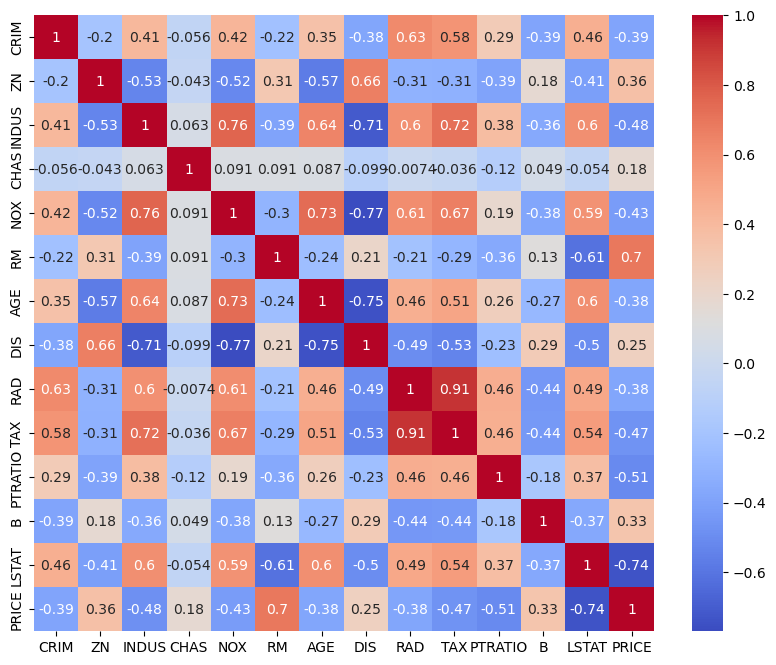

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


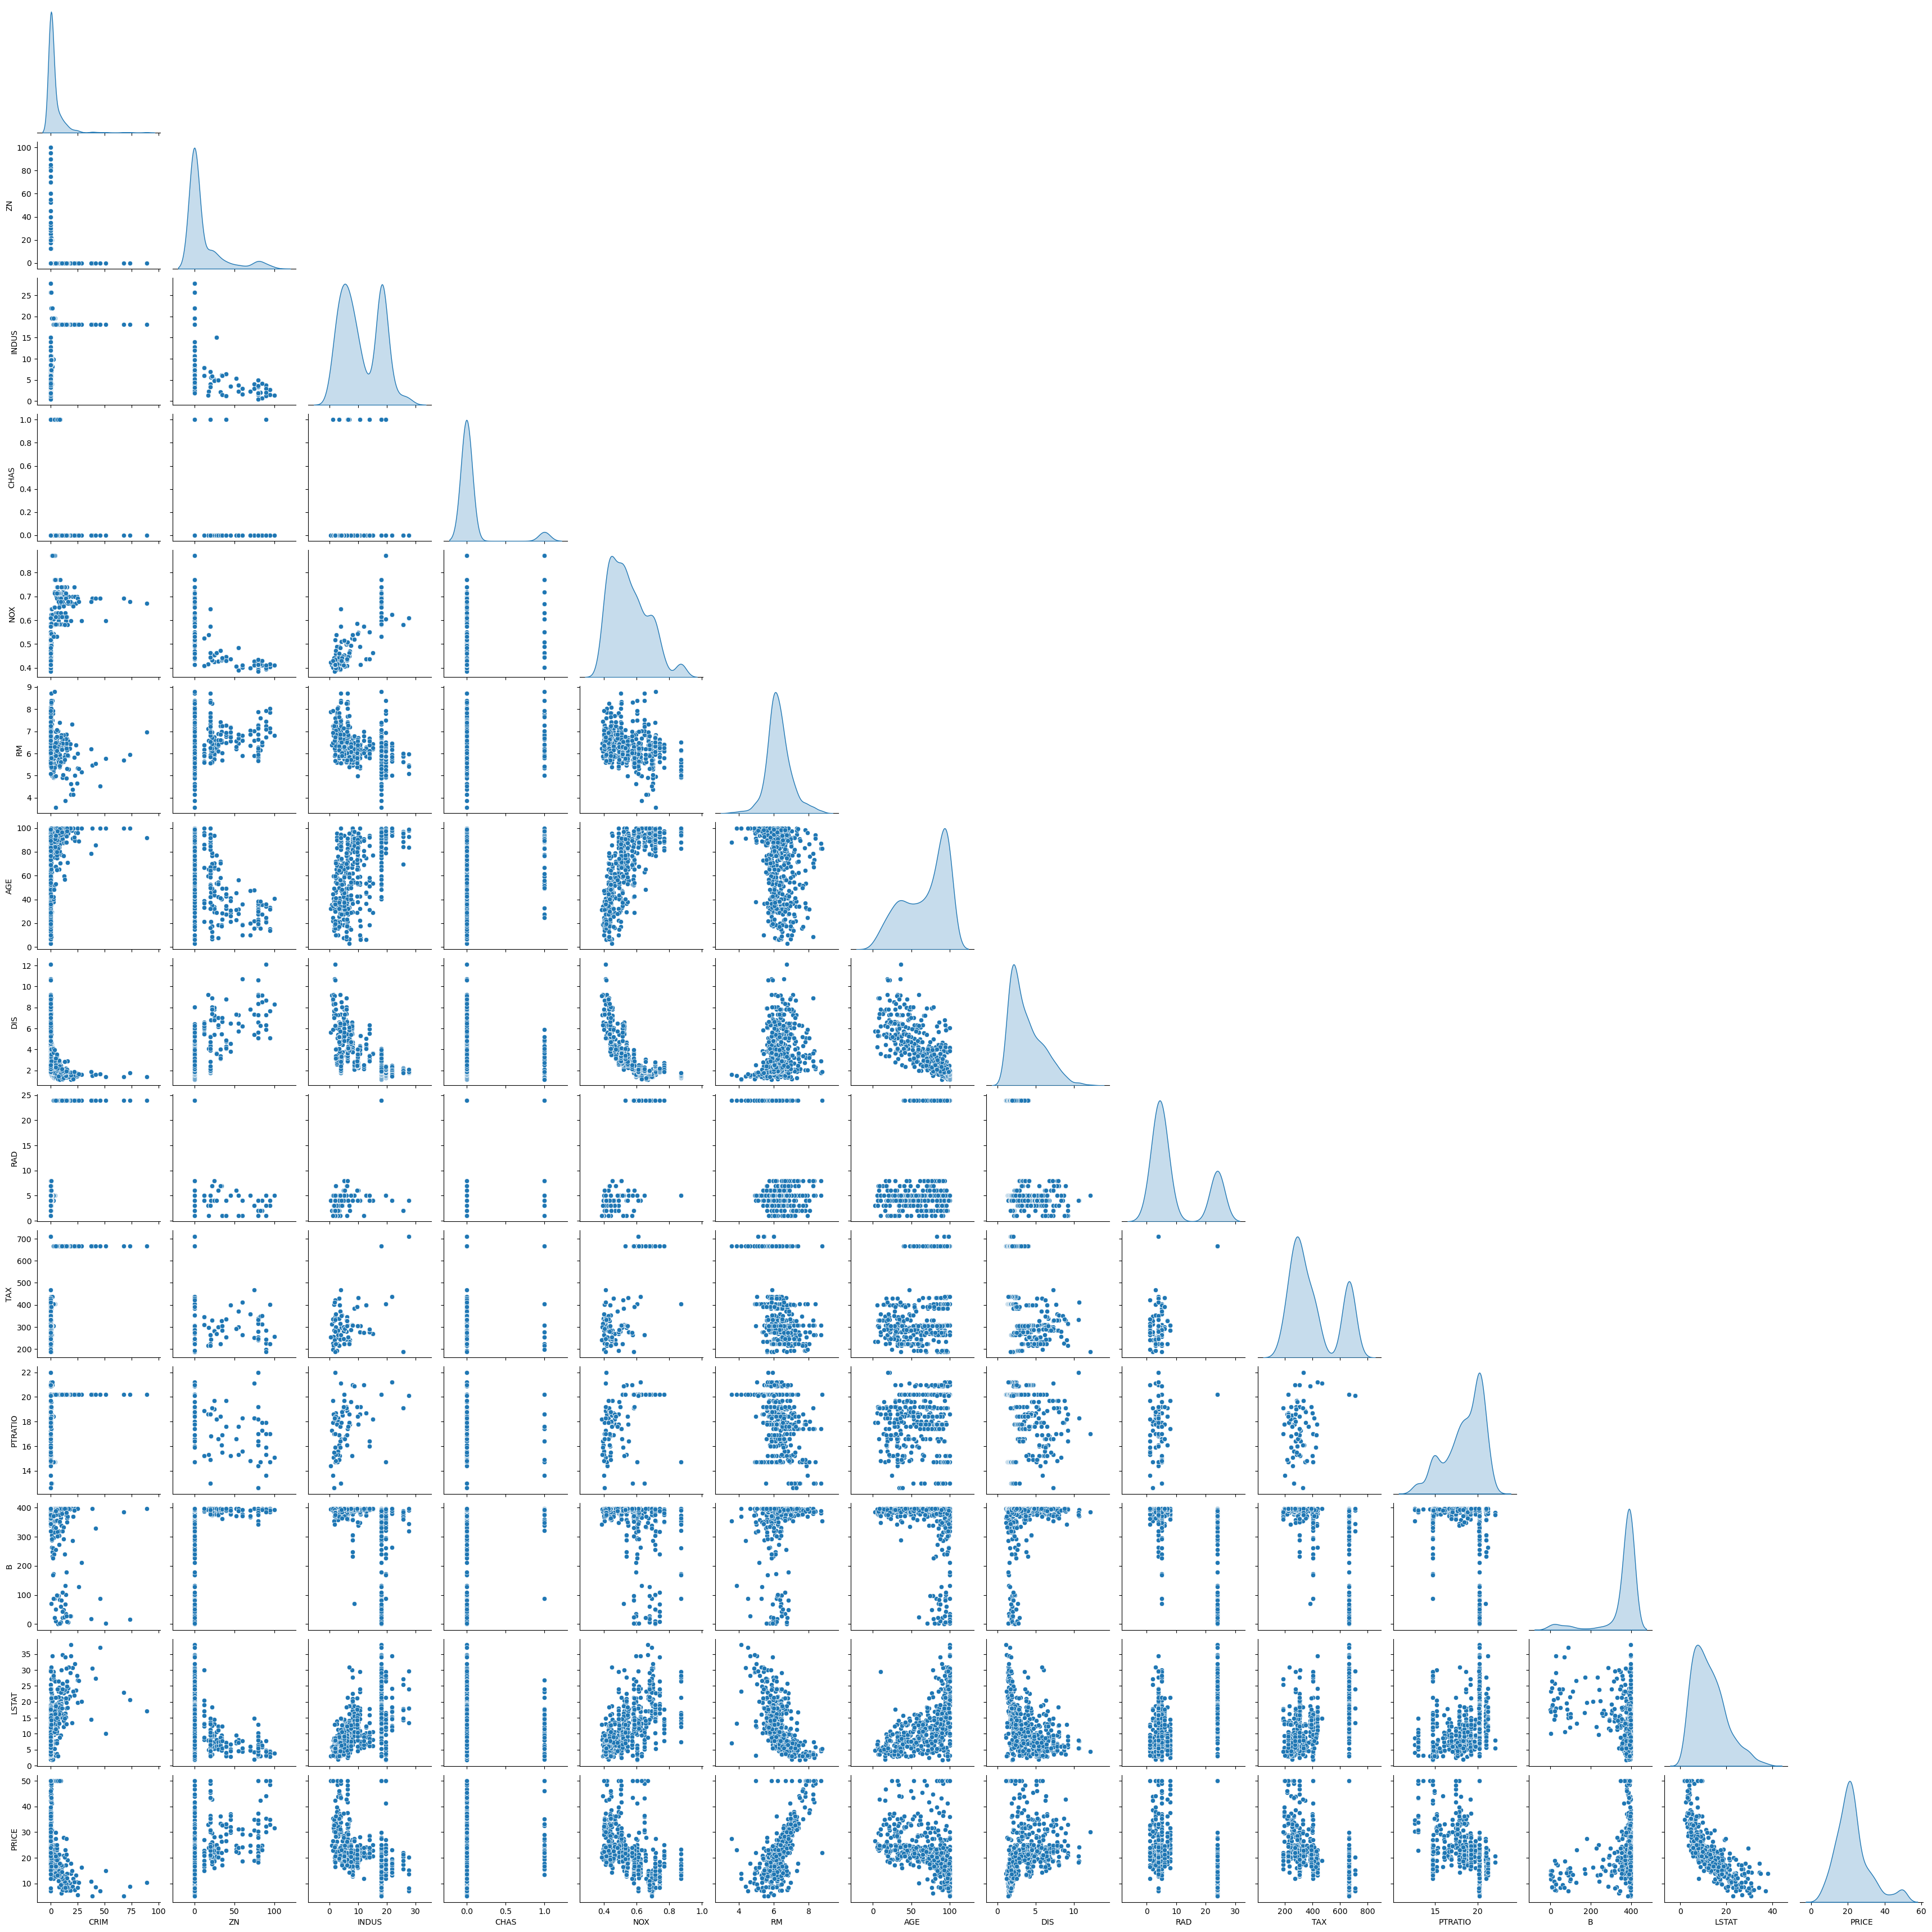

In [25]:
#1. Cree un pairplot para todas las variables e indique dos conclusiones relevantes a partir de este análisis
sns.pairplot(df, diag_kind="kde", corner=True)
plt.show()

Solución:

1. Se tiene un dataset con 14 variables numéricas, por lo que tenemos un pairplot muy recargado visualmente y se torna un tanto dificil hallar algunos patrones facilmente.
2. Se ha decidido realizar un análisis previo antes del pairplot para ubicar un camino a seguir. Lo primero fue sacar métricas del dataset, obteniendo lo siguiente:
    - CRIM: tiene una media de 3.61 versus la mediana de 0.256, lo que sugiere que existen outliers, además contiene valores extremos grandes, todo indica un fuerte sesgo positivo.
    - ZN: claramente se que la mitad de los datos estan llenos de 0, veremos como se ve en el pairplot.
    - CHAS: es de naturaleza booleano, solo acepta 0 y 1, así que lo veremos en lados opuestos.
    - RM: la media de 6.28 y su mediana de 6.20 indica una buena señal de la distribución de sus datos.
    - TAX: la que tiene mayor tasa de dispersion de sus datos.
3. Se ha generado la matríz de correlación y se puede resaltar:
    - Existe una realción positiva fuerte de **0.7** entre **PRICE y RM**
    - Existe una realción negativa fuerte de **-0.74** entre **PRICE y LSTAT**
    - Existe una realción positiva fuerte de **0.91** entre **TAX y RAD**
4. Se configuró el gráfico de pairplot para ver el tipo de distribución (diag_kind="kde") y evitar duplicados (corner=True).
5. Se analizó cada hallazgo realizado en los pasos anteriores y se confirma:
    - Si analizamos la variable target que es **PRICE** vemos que existe una relación lineal ascedente con **RM**, lo que significa que a mayor número de habitaciones existe un mayor precio de la propiedad.

    ![price-vs-rm-pairplot](price-vs-rm-pairplot.png)

    - Ahora volteamos con la variable **LSTAT** y vemos que ocurre lo contratio, una relación descendente y no lineal entre comillas, curvo al final como se observa en la imagen. Esto siginificaría que el precio se reduce a medida que aumenta el porcentaje de población con bajo estatus socioeconómicos.

    ![price-vs-lstat-pairplot](price-vs-lstat-pairplot.png)

    - Como ya vimos **CRIM** tiene presencia de valores extremos, se confirma que tiene outliers

    ![crim-outliers](crim-outliers.png)



In [53]:
#2. 
# - ¿Cuál es la media y mediana de los precios de las viviendas en Boston?
media_precio = df["PRICE"].mean()
print(f"Media del precio de las viviendas (miles de dolares): {media_precio:.2f}")

mediana_precio = df["PRICE"].median()
print(f"Mediana del precio de las viviendas (miles de dolares): {mediana_precio:.2f}")

# - ¿Cuál la desviación estándar y rango intercuartil de los precios de las viviendas de Boston?
desviacion_estandar_precio = df["PRICE"].std()
print(f"Desviación estándar del precio de las viviendas (miles de dolares): {desviacion_estandar_precio:.2f}")

rango_intercuartil_precio = df["PRICE"].quantile(0.75) - df["PRICE"].quantile(0.25)
print(f"Rango intercuartil del precio de las viviendas (miles de dolares): {rango_intercuartil_precio:.2f}")

# - Interprete cada uno de estos valores.
# - R1: El precio promedio de las viviendas son de aprox. 22.5 mil dolares
# - R2: La mediana del precio de las viviendas es de 21.2 mil dólares, lo que indicaría que la mitad de las viviendas valen menos de 21.2 mil dólares.
# - R3: Los precios varian en promedio unos 9.2 mil dólares respecto a la media.
# - R4: El rango intercuartil indica que el 50% de las viviendas tienen un precio que oscila entre 17 mil dolares y 25.3 mil dólares, es decir 7.98 mil dólares.

# - ¿Cuál medida de tendencia central y de variabilidad usaría para describir el precio de las viviendas de Boston? 
# - R5: Partimos de que si incluyéramos la media, sería arrastrar támbien valores atípicos u outliers, ya que estos valores pueden influir drásticamente en la media,
#       a diferencia si utilizamos la mediana como medida de tendencia central, que no se ve afectada por estas situaciones.
#       Ejemplo, si unas casas que tienen precios muy altos o muy bajos, afectarían la media, aunque la mayoría de casas no tenga ese valor.
#
#       En cuanto a la medida de variabilidad, tenemos a la desviación estandar, que tambien se ve afectado por los valores atípicos u outliers,
#       por lo que en este caso, el rango intercuartil sería mi mejor opción, ya que se centra en el rango central de la data, y no se afecta por los valores extremos.



Media del precio de las viviendas (miles de dolares): 22.53
Mediana del precio de las viviendas (miles de dolares): 21.20
Desviación estándar del precio de las viviendas (miles de dolares): 9.20
Rango intercuartil del precio de las viviendas (miles de dolares): 7.98


In [74]:
# 3. 
# - ¿Cuál es la proporción de viviendas que están cerca del río Charles (variable "CHAS")?
proporcion_chas = df["CHAS"].mean()
print(f"Proporción de viviendas cerca del río Charles: {proporcion_chas:.2%}")
print(f"Proporción de viviendas lejos del río Charles: {1 - proporcion_chas:.2%}")

# - R1: Aprox. el 6.92% de las casas estan cerca del río Charles, el resto 93.08% estan lejos.

Proporción de viviendas cerca del río Charles: 6.92%
Proporción de viviendas lejos del río Charles: 93.08%


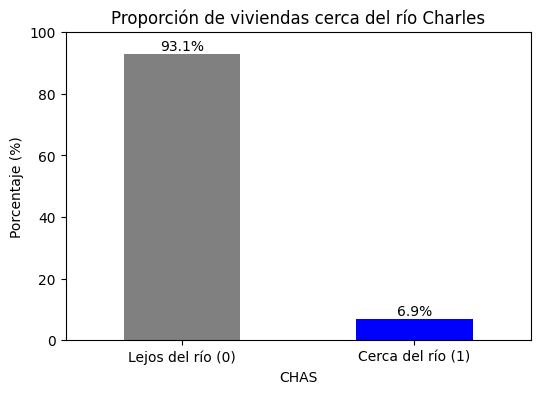

In [9]:
# - Además, cree un gráfico que muestre la proporción de viviendas cerca y lejos del río Charles.
# - R2: Aplico un gráfico de proporciones pero representadas por porcentajes para que sea mas legible y facil de interpretar.

proporciones = df["CHAS"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(6, 4))
proporciones.plot(kind="bar", color=["gray", "blue"])
plt.xticks([0,1], ["Lejos del río (0)", "Cerca del río (1)"])
plt.xticks(rotation=0)
plt.ylabel("Porcentaje (%)")
plt.title("Proporción de viviendas cerca del río Charles")

# Agregar etiquetas encima de cada barra
for i, value in enumerate(proporciones.values):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center')

plt.ylim(0, 100)
plt.show()

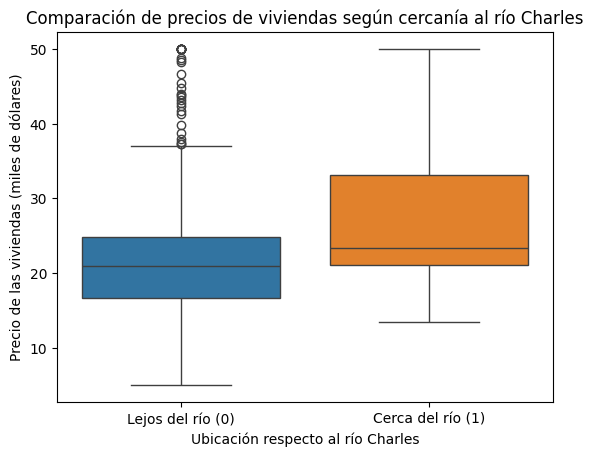

In [10]:
# 4. Cree un gráfico que permita comparar los precios de las viviendas en función de la variable "CHAS" 
plt.figure()
sns.boxplot(x="CHAS",y="PRICE",hue="CHAS",data=df,legend=False)
plt.xticks([0,1], ["Lejos del río (0)", "Cerca del río (1)"])
plt.xlabel("Ubicación respecto al río Charles")
plt.ylabel("Precio de las viviendas (miles de dólares)")
plt.title("Comparación de precios de viviendas según cercanía al río Charles")
plt.show()

# ¿Hay alguna diferencia en los precios de las viviendas en función de esta variable?
# - R1: A simple vista podemos observar que la mediana del precio de las viviendas cercanas al río Charles 
#       es mayor que la mediana de las viviendas lejanas al río, lo que significa que estas viviendas
#       presentan precios ligeramente mas altos, pero igual existe un solapamiento entre ambos.
#       Con respecto al IQR, las viviendas cercanas al río tienen una mayor dispersion de precios,
#       a diferencia de las que estan lejos del río, así tambien hay viviendas muy caras que no estan cerca del río.       

In [100]:
#5. Indique el coeficiente de correlación entre la variable "RM" (número promedio de habitaciones por vivienda) y el precio de las casas.
correlacion_rm_price = df['RM'].corr(df['PRICE'])
print(f"Coeficiente de correlación entre RM y PRICE: {correlacion_rm_price:.2f}")

#  Interprete dicho coeficiente.

# - R1: El coeficiente de correlación entre RM y PRICE es positivo y cercano a 1, lo que indica una fuerte correlación positiva.
#       Esto significa que a medida que aumenta el número promedio de habitaciones por vivienda, aumenta tambien el precio de las casas.

Coeficiente de correlación entre RM y PRICE: 0.70


In [ ]:
#6. 
#   ¿Cuáles son las dos variables más fuertemente positivamente correlacionadas y
#   más negativamente correlacionadas con el precio de las casas?.
corr_price = df.corr()["PRICE"].sort_values(ascending=False)
corr_price

# - R1: La variable con mayor correlación positiva es "RM" con un 0.7
#       y la variable con la mayor correlación negativa es "LSTAT" con un -0.74

#   Interprete esto: ¿Le hace sentido? ¿Cuáles serían las razones detrás de estos patrones observados?
# - R2: Tiene sentido dado que a mayor número de habitaciones, mayor será el precio de la casa,
#       por que se supone que tiene mayor espacio, mas comodidades, etc. En cambio a mayor porcentaje de población
#       con estatus socioeconómico bajo, menor será el precio de las casas, dado que estas zonas suelen ser menos favoritas para vivir.
#       En conclusión, una casa mas grande implica un costo mayor, lo mismo que si estaría en una buena zona.

PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

## Parte 2: Missingness (conceptual) (3 puntos)

Reflexión de missingness:
    
1) ¿Cuáles son los riesgos de imputar datos de manera inapropiada? En particular, ¿Cuáles son los efectos de imputar valores constantes (como media, mediana o moda), cuando el porcentaje de valores perdidos es alto?

3) Indage de internet, ¿cómo se puede evaluar la calidad de la imputación?

4) ¿Cuáles son los trade-offs de eliminar datos en lugar de imputarlos, especialmente en el caso de que se tengan pocas observaciones?

## Parte 3: Missingness (aplicado) (5 puntos)

Vamos a trabajar con el dataset ["braziltourism"](https://www.openml.org/search?type=data&sort=runs&id=186&status=active), ya se brinda el código para leer esta data.

1. Calcule el porcentaje de valores faltantes por cada columna y ordénelo de mayor a menor. Visualice los valores faltantes mediante un gráfico.

2. Realice el tratamiento de los valores faltantes de la manera que considere más adecuada. Sustente sus decisiones.

3. Para el caso particular de la variable "Income", cree nuevas variables imputando los valores faltantes utilizando: a) la media b) la mediana c) la moda d) regresión lineal e) KNN f) MICE

*Nota: Para los métodos que requieran seleccionar otras variables predictoras, elija aquellas que considere más adecuadas.

4. Conceptualmente, ¿qué tratamiento debería realizarse a la variable "Logged_income"?

5. Cree histogramas o gráficos de densidad que muestre la distribución de los valores de "Income" antes de imputar y después de imputar utilizando cada uno de los métodos. ¿Qué puede concluir?

In [11]:
from sklearn.datasets import fetch_openml
import missingno as msno

# Obtener el dataset de braziltourism (ID 186 corresponde al dataset braziltourism)
braziltourism = fetch_openml(data_id=186).frame
braziltourism.head()

,Age,Sex,Income,Travel_cost,Access_road,Active,Passive,Logged_income,Trips
0,35.0,0,250.00,48.0003,1,1,0,5.521461,0
1,25.0,1,218.75,52.2000,0,2,2,5.387930,0
2,37.0,0,1875.00,163.5000,0,0,0,7.536364,0
3,29.0,1,781.25,87.0000,0,0,0,6.660895,0
4,54.0,0,562.50,21.0000,0,0,0,6.332391,0


## Parte 4: Datos atípicos (7 puntos)

### 4.1 Análisis visual (univariado y bivariado) para determinar atípicos + Introducción al feature engineering (3 puntos)

En clase realizamos una actividad en Menti, donde recopilamos 103 registros de talla y peso. Para explorar la distribución de los datos y detectar valores atípicos, comenzamos con un **análisis univariado** utilizando boxplots. Según este criterio, **no se identificaron valores atípicos** ni en la talla ni en el peso de manera individual. Sin embargo, al realizar un **análisis bivariado** mediante un scatterplot, detectamos **tres casos atípicos**. En la siguiente celda del cuaderno se muestra el código utilizado para este análisis.  

Ahora, como introducción al **feature engineering** (proceso de transformar y construir nuevas características que representen mejor los patrones subyacentes en los datos), podemos crear una nueva variable: el **Índice de Masa Corporal (IMC)**. Este se calcula dividiendo el **peso (kg)** entre la **talla (m) al cuadrado**.  

### Instrucciones:  
1. Cree una nueva columna con el cálculo del IMC.  
2. Realice un análisis univariado de esta nueva variable mediante un boxplot o un histograma.  
3. Responda las siguientes preguntas:  
   - ¿Observa algún dato atípico según este análisis? ¿Cuántos valores atípicos logró identificar?
   - ¿Este análisis univariado permitió identificar patrones que no detectamos en el análisis previo en clase? ¿Qué ocurrió / por qué pasó? 

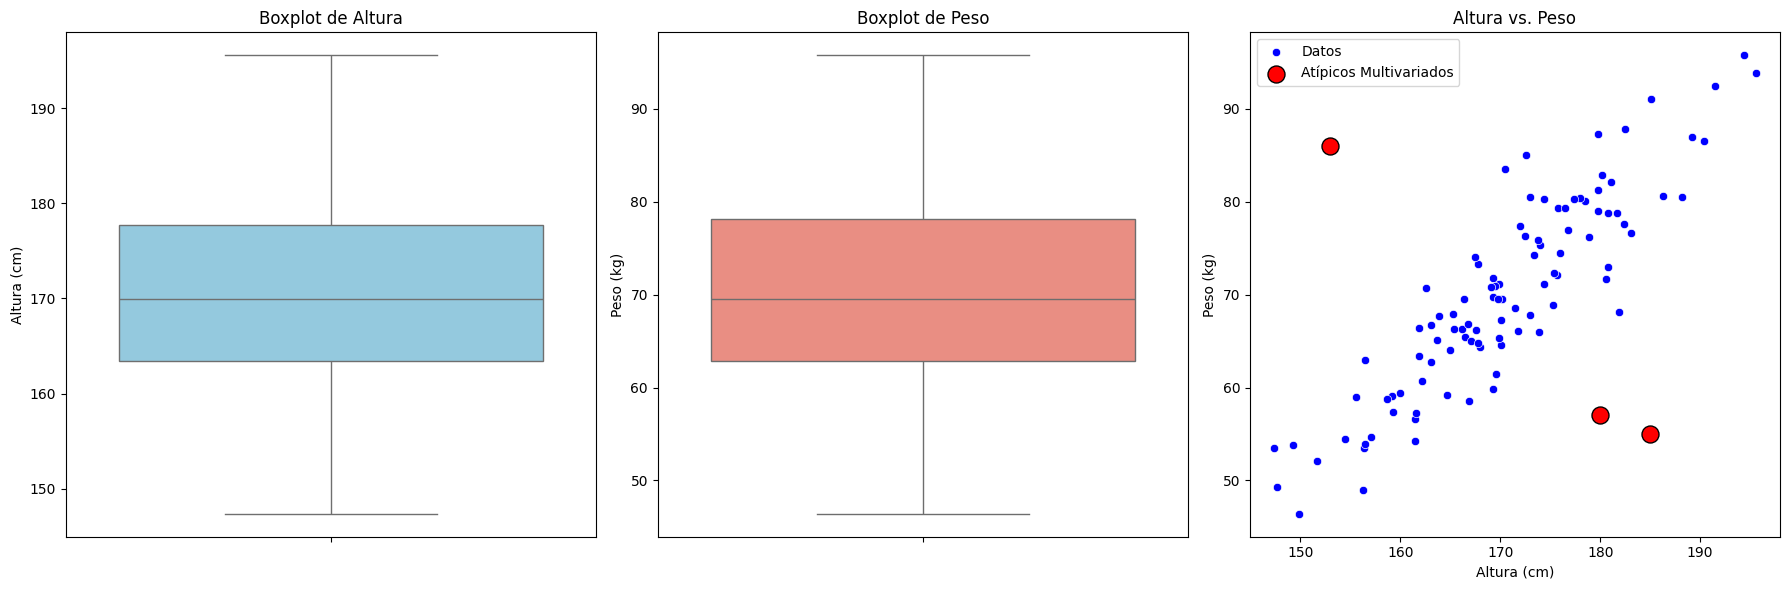

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from pathlib import Path

# Definir la media y la matriz de covarianza para la distribución normal multivariada
np.random.seed(44)
mean = [170, 70]  # Media para altura y peso
cov = [[100, 90],  # Alta covarianza para generar atípicos multivariados
       [90, 100]]  

# Generar datos con distribución normal multivariada
altura, peso = np.random.multivariate_normal(mean, cov, 100).T

# Convertir a DataFrame
data = pd.DataFrame({'Altura': altura, 'Peso': peso})

# Calcular el IQR para la detección de valores atípicos univariados
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos univariados
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Agregar manualmente **valores atípicos multivariados** (normales en univariado pero extremos en la distribución conjunta)
multivariate_outliers = pd.DataFrame({'Altura': [185, 153, 180], 'Peso': [55, 86, 57]})
data = pd.concat([data, multivariate_outliers], ignore_index=True)

# Configurar la figura con tres gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot de Altura 
sns.boxplot(y=data['Altura'], ax=axes[0], color='skyblue', showfliers=True)
axes[0].set_title("Boxplot de Altura")
axes[0].set_ylabel("Altura (cm)")

# Boxplot de Peso 
sns.boxplot(y=data['Peso'], ax=axes[1], color='salmon', showfliers=True)
axes[1].set_title("Boxplot de Peso")
axes[1].set_ylabel("Peso (kg)")

# Scatterplot con valores atípicos multivariados resaltados
sns.scatterplot(x=data['Altura'], y=data['Peso'], ax=axes[2], label="Datos", color='blue')
sns.scatterplot(x=multivariate_outliers['Altura'], y=multivariate_outliers['Peso'], color='red', ax=axes[2], label="Atípicos Multivariados", s=150, edgecolor='black')
axes[2].set_title("Altura vs. Peso")
axes[2].set_xlabel("Altura (cm)")
axes[2].set_ylabel("Peso (kg)")

plt.tight_layout()
plt.show()

# IMC Feature

<Axes: xlabel='IMC', ylabel='Count'>

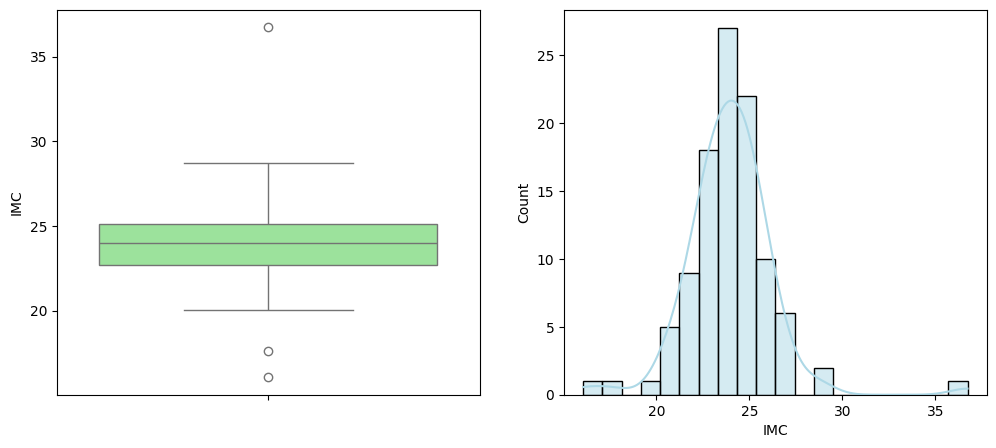

In [4]:
data["IMC"] = data["Peso"] / (data["Altura"] / 100) ** 2

# Boxplot de IMC

fig, ax = plt.subplots(1,2,figsize=(12, 5))
sns.boxplot(y=data['IMC'], ax=ax[0], color='lightgreen', showfliers=True)
sns.histplot(data['IMC'], ax=ax[1], kde=True, color='lightblue')

- Si se pueden observar tres outliers, dos por debajo de un IMC de 20 y uno con un IMC mayor a 35.

- Efectivamente, este nuevo *feature* nos permite ver nuevos patrones de la data. Esto se debe a que el IMC es una métrica que incluye a ambas variables (peso y altura) al igual que el scatter plot pero con la diferencia de que es un número que incorpora ambas. Es por esta razón que pudimos identificar a los outliers.

### 4.2 Métodos estadísticos univariados, limitaciones y transformaciones (4 puntos)

Para distribuciones con colas largas, los métodos tradicionales de detección de atípicos como la desviación estándar o el rango intercuartil (IQR) pueden no ser adecuados, ya que pueden clasificar erróneamente valores extremos como outliers cuando en realidad forman parte de la distribución natural. 

### 4.2.1 (1 puntos)
¿Cómo podría ajustar cada uno de **estos dos métodos descritos anteriormente** para hacerlos más robustos frente a estos casos de distribuciones asimétricas de largas colas?

El problema de los métodos como desviación estándar, z-score y el IQR se debe a que asumen una distribución estándar o al menos una distribución simétrica. Entre las opciones que tenemos para volverlas siméticas tenemos a:

- Transformación logarítmica:  Lo que hace la función del logaritmo es comprimir las colas largar a la derecha permitiendo que la distribución sea más simétrica. Esto hace que ya podamos aplicar los métodos como z-score o IQR para detectar a los outliers. (Ejemplo abajo)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9872\3221685493.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


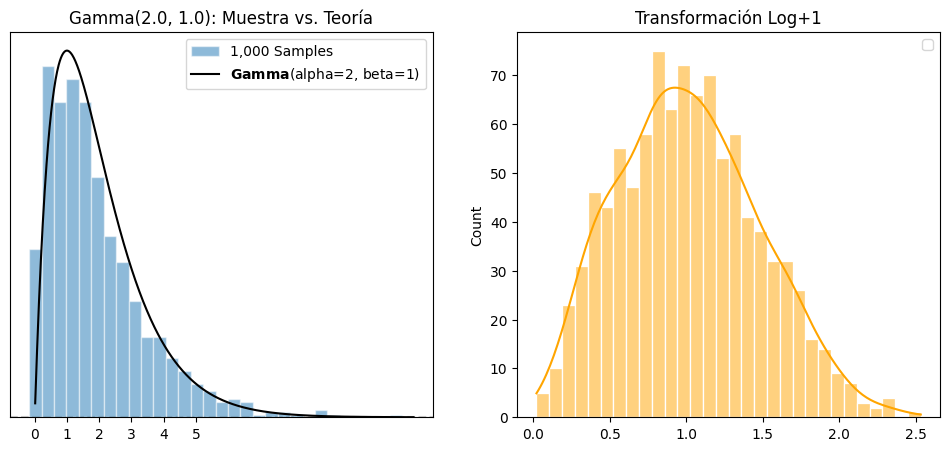

In [30]:
import preliz as pz
import matplotlib.pyplot as plt

dist = pz.Gamma(alpha=2.0, beta=1.0)  
samples = dist.rvs(1000)

fig, axs = plt.subplots(1,2,figsize=(12, 5))

axs[0].hist(samples, bins=30, density=True, alpha=0.5, 
    label='1,000 Samples', edgecolor='white', align='left')

dist.plot_pdf(ax=axs[0], color='black')


axs[0].set_title("Gamma(2.0, 1.0): Muestra vs. Teoría")
axs[0].set_xticks(range(6))
axs[0].legend()

log_transformation = np.log(samples + 1)
sns.histplot(log_transformation, bins=30, kde=True, ax=axs[1], color='orange', edgecolor='white')
axs[1].set_title("Transformación Log+1")
axs[1].legend()

- Transformación Box-Cox: Esta transformación intenta estabilizar la varianza y hace que la data siga una distribución normal.

$$
y^{(\lambda)}_{i} = 
\begin{cases} 
\frac{y_{i}^{\lambda} - 1}{\lambda} & \text{if } \lambda \neq 0 \\ 
\ln(y_{i}) & \text{if } \lambda = 0 
\end{cases}
$$

En la ecuación de arriba, la transformación $\frac{y_{i}^{\lambda} - 1}{\lambda}$ sucede para valores positivos. Y $\lambda$ se halla mediante máxima verosimilitud.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9872\2204086872.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


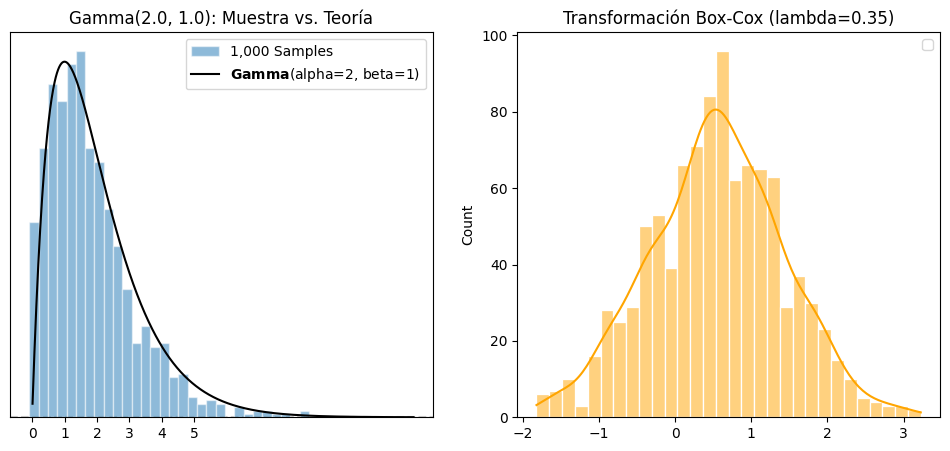

In [29]:
from scipy import stats

transformed_data, lambda_value = stats.boxcox(samples)

fig, axs = plt.subplots(1,2,figsize=(12, 5))

axs[0].hist(samples, bins=30, density=True, alpha=0.5, 
    label='1,000 Samples', edgecolor='white', align='left')

dist.plot_pdf(ax=axs[0], color='black')


axs[0].set_title("Gamma(2.0, 1.0): Muestra vs. Teoría")
axs[0].set_xticks(range(6))
axs[0].legend()

log_transformation = np.log(samples + 1)
sns.histplot(transformed_data, bins=30, kde=True, ax=axs[1], color='orange', edgecolor='white')
axs[1].set_title(f"Transformación Box-Cox (lambda={lambda_value:.2f})")
axs[1].legend()

### 4.2.2 (3 puntos)

Justamente vamos a trabajar con una distribución con fuerte asimetría positiva. Nuestra variable de interés será "TotalPayBenefits".
Para todo el ejercicio, vamos a considerar salarios de año 2014 y Status "Full Time" (FT). **Ejecute estos filtros para el análisis.**

a) Grafique un histograma de esta distribución.

b) Luego determine los atípicos bajo el criterio del gráfico de cajas y del puntaje z. Muestre los cortes (superior e inferior) bajo cada criterio e indique el % de atípicos del dataset bajo ambos criterios. Comente sobre estos resultados.

c) Ahora realice lo mismo que el punto b) pero aplicando la propuesta que indicó en la pregunta teórica. Comente sus resultados.

In [31]:
# Leer el dataset.
salaries = pd.read_csv("Salaries.csv")
print(salaries.shape)
salaries.head(10)

(148654, 13)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9872\1507038402.py:2: DtypeWarning: Columns (0: BasePay, 1: OvertimePay, 2: OtherPay, 3: Benefits, 4: Status) have mixed types. Specify dtype option on import or set low_memory=False.
  salaries = pd.read_csv("Salaries.csv")


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [39]:
var_of_interest = "TotalPayBenefits"

salaries_filtered = salaries[(salaries["Year"] == 2014) & (salaries["Status"] == "FT")]

salaries_filtered.head(6)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT
110536,110537,Ellen G Moffatt,Asst Med Examiner,270222.04,6009.22,67956.2,71580.48,344187.46,415767.94,2014,NaN,San Francisco,FT
110537,110538,John L Martin,Dept Head V,311298.55,0.0,0.0,89772.32,311298.55,401070.87,2014,NaN,San Francisco,FT
110538,110539,Harlan L Kelly-Jr,Executive Contract Employee,310161.02,0.0,0.0,88823.51,310161.02,398984.53,2014,NaN,San Francisco,FT


<Axes: xlabel='TotalPayBenefits', ylabel='Count'>

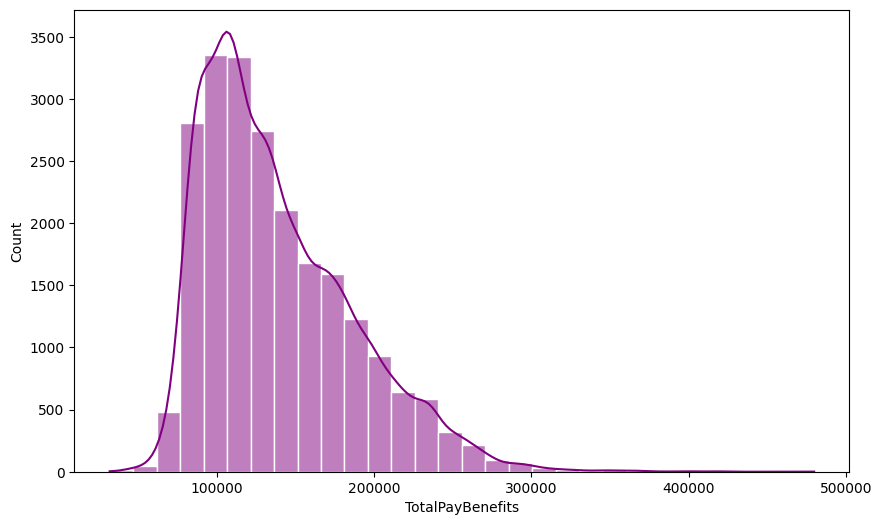

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(salaries_filtered[var_of_interest], bins=30, kde=True, ax=ax, color='purple', edgecolor='white')

**Criterio de Gráfoco de Cajas**

In [56]:
def out_iqr(df , column, verbose=True):
    global lower, upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calcular el IQR
    iqr = q75 - q25
    # calcular el umbral de los valores atípicos
    cut_off = iqr * 1.5
    # calcular el valor del límite inferior y superior
    lower, upper = q25 - cut_off, q75 + cut_off

    if verbose:
        print('El IQR es', iqr)
        print('El valor del límite inferior es', lower)
        print('El valor del límite superior es', upper)
    # Calcular el número de registros por debajo del límite inferior y por encima del límite superior respectivamente
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    
    if verbose:
        print('El número total de valores atípicos es', df1.shape[0] + df2.shape[0])

    return df1.shape[0] + df2.shape[0]

out_iqr(salaries_filtered, var_of_interest)

El IQR es 65432.369999999995
El valor del límite inferior es 3882.607500000013
El valor del límite superior es 265612.0875
El número total de valores atípicos es 293


293

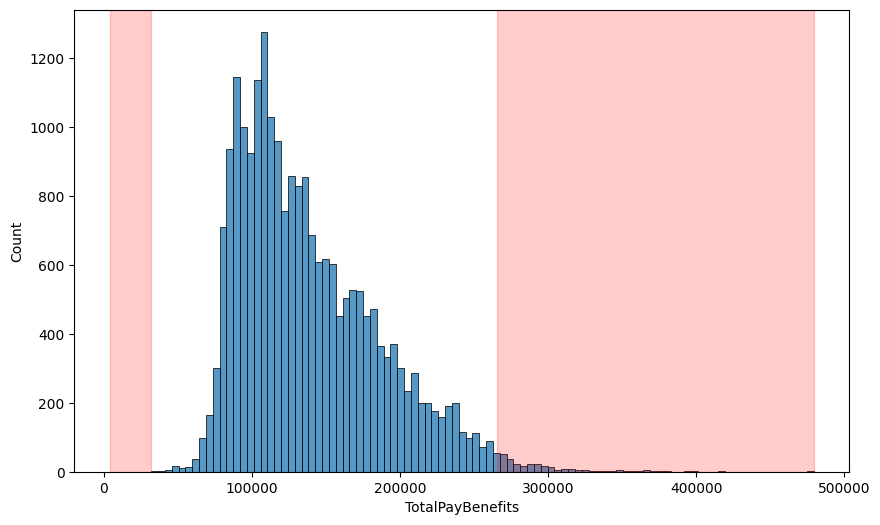

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(salaries_filtered[var_of_interest], kde=False)
plt.axvspan(xmin = lower,xmax= salaries_filtered[var_of_interest].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= salaries_filtered[var_of_interest].max(),alpha=0.2, color='red')

**Criterio del z-score**

In [58]:
def out_zscore(df, column, verbose=True):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3 
    data = df[column]
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    
    if verbose:
        print("El número total de atípicos es",len(outliers))

    return len(outliers)

out_zscore(salaries_filtered, var_of_interest)

El número total de atípicos es 163


163

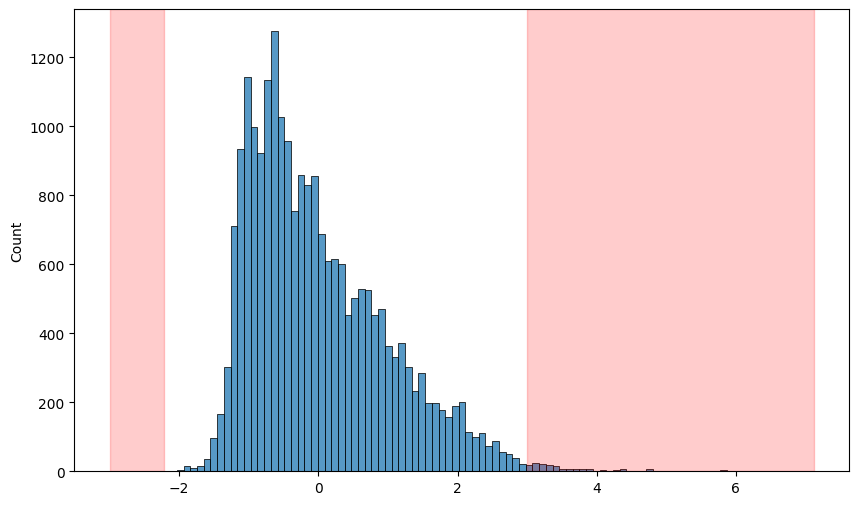

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(zscore)
ax.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')
ax.axvspan(xmin = min(zscore),xmax= -3,alpha=0.2, color='red')

In [64]:
iqr_count = out_iqr(salaries_filtered, var_of_interest, verbose=False)

percent_of_outliers_from_iqr = (iqr_count / salaries_filtered.shape[0]) * 100
print(f"El porcentaje de valores atípicos detectados por IQR es: {percent_of_outliers_from_iqr:.2f}% que es {iqr_count} de {salaries_filtered.shape[0]} records.")


z_score_count = out_zscore(salaries_filtered, var_of_interest, verbose=False)
percent_of_outliers_from_zscore = (z_score_count / salaries_filtered.shape[0]) * 100
print(f"El porcentaje de valores atípicos detectados por Z-score es: {percent_of_outliers_from_zscore:.2f}% que es {z_score_count} de {salaries_filtered.shape[0]} records.")

El porcentaje de valores atípicos detectados por IQR es: 1.31% que es 293 de 22334 records.
El porcentaje de valores atípicos detectados por Z-score es: 0.73% que es 163 de 22334 records.


Se puede ver que debido a que la distribución tiene usa asimetría positiva los métodos de IQR y z-score detectan 293 y 163 outliers respectivamente. Estos valores están inflados debido a la asimetrpia de la distribución de la variable `TotalPayBenefits`.

Ahora aplicaremos la transformación de Box-Cox e identificaremos a los outliers.

<Axes: ylabel='Count'>

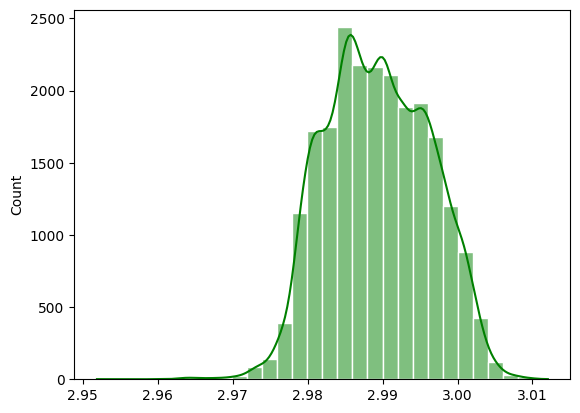

In [67]:
transformed_data, lambda_value = stats.boxcox(salaries_filtered[var_of_interest] + 1)

salaries_filtered["box_cox"] = transformed_data

sns.histplot(transformed_data, bins=30, kde=True, color='green', edgecolor='white')


El IQR es 0.010479317968721702
El valor del límite inferior es 2.968515301821405
El valor del límite superior es 3.010432573696292
El número total de valores atípicos es 33


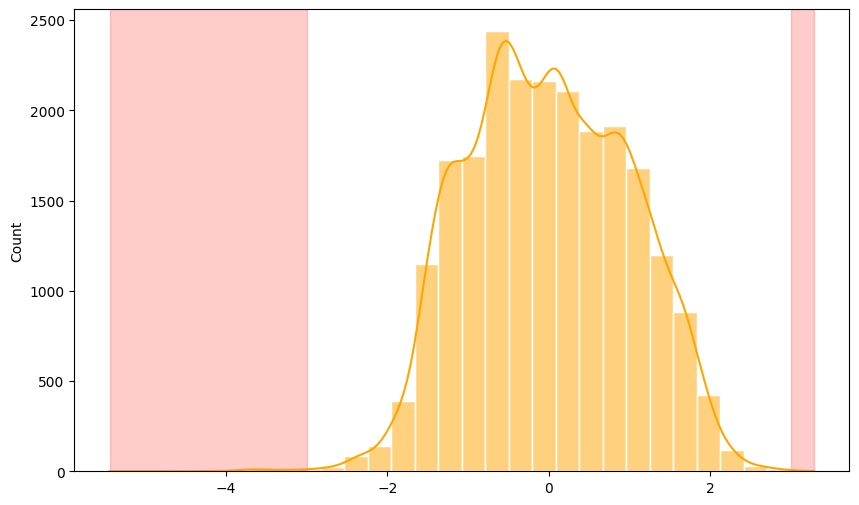

In [71]:
out_iqr(salaries_filtered, "box_cox", verbose=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(zscore, bins=30, kde=True, ax=ax, color='orange', edgecolor='white')
ax.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')
ax.axvspan(xmin = min(zscore),xmax= -3,alpha=0.2, color='red')

El número total de atípicos es 36


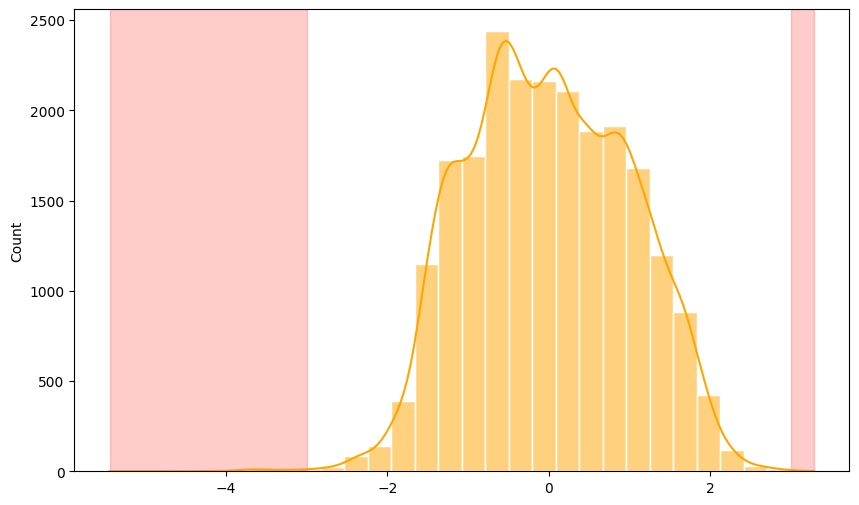

In [70]:
out_zscore(salaries_filtered, "box_cox", verbose=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(zscore, bins=30, kde=True, ax=ax, color='orange', edgecolor='white')
ax.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')
ax.axvspan(xmin = min(zscore),xmax= -3,alpha=0.2, color='red')

In [68]:
iqr_count = out_iqr(salaries_filtered, "box_cox", verbose=False)

percent_of_outliers_from_iqr = (iqr_count / salaries_filtered.shape[0]) * 100
print(f"El porcentaje de valores atípicos detectados por IQR es: {percent_of_outliers_from_iqr:.2f}% que es {iqr_count} de {salaries_filtered.shape[0]} records.")


z_score_count = out_zscore(salaries_filtered, "box_cox", verbose=False)
percent_of_outliers_from_zscore = (z_score_count / salaries_filtered.shape[0]) * 100
print(f"El porcentaje de valores atípicos detectados por Z-score es: {percent_of_outliers_from_zscore:.2f}% que es {z_score_count} de {salaries_filtered.shape[0]} records.")

El porcentaje de valores atípicos detectados por IQR es: 0.15% que es 33 de 22334 records.
El porcentaje de valores atípicos detectados por Z-score es: 0.16% que es 36 de 22334 records.


Ahora se ve una clara diferencia cuando se identifican a los outliers sobre la variable de interes transformada con Box-Cox.
IQR ha identificado 33 puntos y z-score 36 puntoos respectivamente. Esto es mucho menor que lo que se habia indentificado sin la transformación (293 y 163).